In [2]:
# Optimal gradient steepest descent method
# Problem 14.8 (Numerical Methods for Engineers, Chapra & Canale, 6th edition)
# Author: Frank Jenkins

from sympy import *
import numpy as np
import time 

start = time.time()


def func(x, y): 
    return -8*x + x**2 + 12*y + 4*y**2 - 2*x*y

# Negative partial derivative wrt x  
def dx(x,y): 
    dx = 8 - 2*x + 2*y
    return dx

# Negative partial derivative wrt y
def dy(x, y):
    dy = 2*x - 8*y - 12
    return dy


h = Symbol('h', real = True)

x = 0
y = 0

# Partial derivative wrt x = -8 + 2*x - 2*y

# Partial derivative wrt y = 12 + 8*y - 2*x 
	
d2x = 2 # Second derivative wrt x
d2y = 8 # Second derivative wrt y

dxdy = -2 # Second derivative wrt yx

# The values (analytical solution) of the first derivatives set equal to zero
# x = 10/3 = 3.3333333... and y = -2/3 = -0.66666666...

sx = 10/3
sy = -2/3

def errx(x, y):
    errx = (sx - x)/sx
    return abs(errx)

def erry(x, y):
    erry = (sy - y)/sy
    return abs(erry)

alpha = 0.0001

def gradientdescent(x, y):
    i = 0
    while(errx(x,y) >= alpha and erry(x,y) >= alpha):
        gradx, grady = x + dx(x, y)*h, y + dy(x, y)*h
        g = func(gradx, grady)
        dg = g.diff(h)
        d = solve(dg, h)
        e = np.array(d)
        m = e[-1]
        x = x + dx(x, y)*m
        y = y + dy(x, y)*m
        i = i + 1
    print("The number of iterations is: ", i)
    return(x, y)

a, b = gradientdescent(x, y)
a = round(a, 4)
b = round(b, 4)

hessian = d2x*d2y - dxdy**2
    
print("The minimum of f(x, y) is located at:")
print(a, ",", b)

if(hessian > 0 and d2x > 0):
	print("The function f(x, y) has a local minimum")
	print("The Hessian is: ", hessian)
elif(hessian > 0 and d2x < 0):
	print("The function f(x, y) has a local maximum")
	print("The Hessian is: ", hessian)
else:
	print("The function f(x, y) has a saddle point")
	print("The Hessian is: ", hessian)
    
end = time.time()
print("The execution time is: ", end - start)

print("The value of f(x, y) at the approximate minimum is: ", func(a, b))
print("The value of f(x, y) at the exact minimum is: ", func(sx, sy))

print("The difference between the approximate and exact minimum is: ")
print(func(sx, sy) - func(a, b))
print("The percent error between the approximate and exact minimum is: ")
print(((func(sx, sy) - func(a, b))/func(sx, sy))*100, "%")

The number of iterations is:  6
The minimum of f(x, y) is located at:
3.3185 , -0.6666
The function f(x, y) has a local minimum
The Hessian is:  12
The execution time is:  0.02692437171936035
The value of f(x, y) at the approximate minimum is:  -17.33311131
The value of f(x, y) at the exact minimum is:  -17.333333333333336
The difference between the approximate and exact minimum is: 
-0.00022202333333609658
The percent error between the approximate and exact minimum is: 
0.0012809038461697878 %


Text(0.5,0,'z')

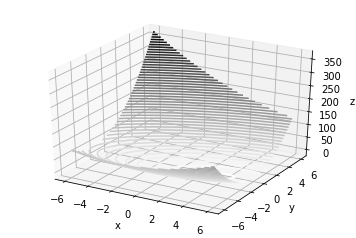

In [3]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt


x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = func(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')